# Python Pandas Analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Some basic stuff:
Data Frame can be created by many ways like reading data from excel (pd.read_excel), csv(pd.read_csv), SQL(pd.read_sql) or from Dictionary as well

Can be written as well like df.to_csv("Filepath"), df.to_excel("Filepath"), df.to_sql



In [2]:
df = pd.read_csv("./Sales_Data/Sales_June_2019.csv", nrows = 3)  # limit the rows from csv into the dataframe
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"


### Task #1: Merging 12 months of data into a Single file

In [3]:
df = pd.read_csv("./Sales_Data/Sales_June_2019.csv")

df.shape  # show the count of rows and Column


(13622, 6)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [5]:
df.describe()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,13579,13579,13579,13579,13579,13579
unique,12990,20,8,23,10742,12720
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,23,1564,12233,1564,23,23


In [6]:
files = [file for file in os.listdir("./Sales_Data")]

for file in files:
    print(file)


Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [7]:
all_months_data = pd.DataFrame({})

In [8]:
all_months_data = pd.DataFrame({})

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    

all_months_data.head()

all_months_data.to_csv("all_data.csv", index = False)

# Augment the data with some additional column

### Task #2: Adding one column for month

In [9]:
all_data = pd.read_csv("all_data.csv")

In [10]:
all_data["Order_Month"] = all_data["Order Date"].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Clean up data with blank rows


In [11]:
#all_data["Order_Month"] = all_data["Order Date"].str[0:2].astype("int") -- To convert Date field to Integer
# finding null/blank values in DataFrame
#all_data[all_data.isna().any(axis =1)]   -- Checks the data if any null value is there

# To remove null values from DataFrame
all_data.dropna(how = "all", inplace = True)


In [12]:
#  DataFrame also contains string 'Or*' also in Order date, hence need to 
#  select only those data rows without 'OR' string 

all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']
all_data["Order_Month"] = all_data["Order Date"].str[0:2].astype("int32") 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Question 1: What was the best month for sales? How much was earned that month

In [13]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])


all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [15]:
Month_Sales = all_data[["Order_Month", "Sales"]]
Month_Sales.head()


,Order_Month,Sales
0,12,1700.00
1,12,600.00
2,12,11.95
3,12,149.99
4,12,11.95


In [16]:
results = Month_Sales.groupby("Order_Month").sum()

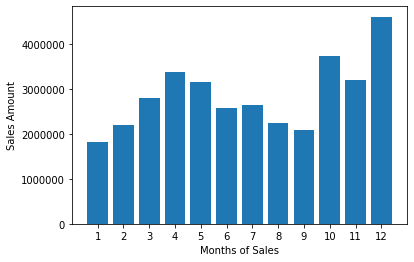

In [17]:
Order_Month = range(1,13)
plt.bar(Order_Month, results["Sales"])
plt.xticks(Order_Month)
plt.xlabel("Months of Sales")
plt.ylabel("Sales Amount")
plt.show()

# Question 2: Which City has heightest number of sales